In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [34]:
df=pd.read_csv('data/stud.csv')


In [35]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [36]:
x=df.drop(columns='math_score',axis=1)
x.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [37]:
y=df['math_score']
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [38]:
num_features=x.select_dtypes(exclude='object').columns
cat_features=x.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder()
preprocessor=ColumnTransformer(
    [
        ('OneHotEncoder',oh_transformer,cat_features),
        ('StandardScaler',numeric_transformer,num_features),
    ]
)

In [39]:
x=preprocessor.fit_transform(x)

In [40]:
x.shape

(1000, 19)

In [41]:
type(x)

numpy.ndarray

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape

((800, 19), (200, 19))

In [43]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2_s=r2_score(true,predicted)
    return mae,rmse,r2_s

In [44]:
models={
    "LinearRegression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "KNeighborsRegressor":KNeighborsRegressor(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "XGBRegressor":XGBRegressor(),
    "CatBoostRegressor":CatBoostRegressor(verbose=False),
    "AdaBoostRegressor":AdaBoostRegressor()
}

model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(x_train,y_train)

    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)

    model_train_mae,model_train_rmse,model_train_r2=evaluate_model(y_train,y_train_pred)
    model_test_mae,model_test_rmse,model_test_r2=evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    print('model performance for training set')
    print('root mean squared error: {:.4f}'.format(model_train_rmse))
    print('mean absolute error: {:.4f}'.format(model_train_mae))
    print('r2_score{:.4f}'.format(model_train_r2))
    print('________________________________________')
    print('model performance for test set')
    print('root mean squared error: {:.4f}'.format(model_test_rmse))
    print('mean absolute error: {:.4f}'.format(model_test_mae))
    print('r2_score:{:.4f}'.format(model_test_r2))
    r2_list.append(model_test_r2)

    print("="*35)
    print('\n')

LinearRegression
model performance for training set
root mean squared error: 5.3274
mean absolute error: 4.2788
r2_score0.8741
________________________________________
model performance for test set
root mean squared error: 5.4096
mean absolute error: 4.2259
r2_score:0.8797


Lasso
model performance for training set
root mean squared error: 6.5938
mean absolute error: 5.2063
r2_score0.8071
________________________________________
model performance for test set
root mean squared error: 6.5197
mean absolute error: 5.1579
r2_score:0.8253


Ridge
model performance for training set
root mean squared error: 5.3233
mean absolute error: 4.2650
r2_score0.8743
________________________________________
model performance for test set
root mean squared error: 5.3904
mean absolute error: 4.2111
r2_score:0.8806


KNeighborsRegressor
model performance for training set
root mean squared error: 5.7122
mean absolute error: 4.5187
r2_score0.8553
________________________________________
model performance fo

In [45]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2_score']).sort_values(by=['R2_score'],ascending=False)

,Model Name,R2_score
2,Ridge,0.880593
0,LinearRegression,0.879740
5,RandomForestRegressor,0.853616
7,CatBoostRegressor,0.851632
8,AdaBoostRegressor,0.849653
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,KNeighborsRegressor,0.783898
4,DecisionTreeRegressor,0.753327


In [48]:
ridge_model=Ridge(fit_intercept=True)
ridge_model.fit(x_train,y_train)
y_pred=ridge_model.predict(x_test)
score=r2_score(y_test,y_pred)*100
print("R2 score for Ridge model: ",score)


R2 score for Ridge model:  88.05931485028738


Text(0, 0.5, 'Predicted')

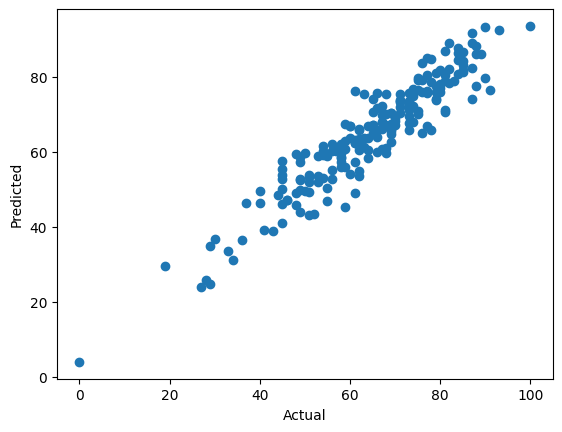

In [49]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math_score'>

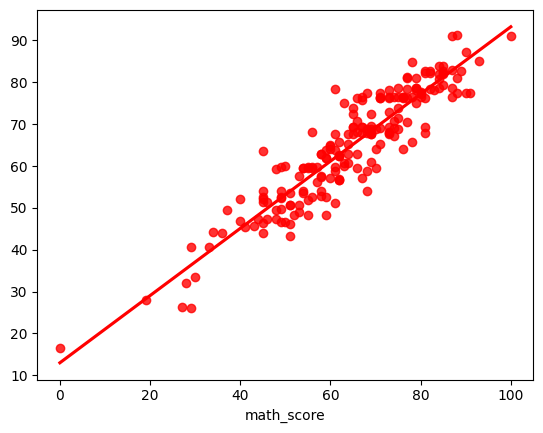

In [50]:
sns.regplot(x=y_test,y=y_test_pred,ci=None,color='red')

In [51]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.398705,14.601295
737,53,58.842469,-5.842469
740,80,76.992129,3.007871
660,74,76.805898,-2.805898
411,84,87.615387,-3.615387
...,...,...,...
408,52,43.492293,8.507707
332,62,62.170763,-0.170763
208,74,67.910325,6.089675
613,65,67.061504,-2.061504


<Axes: xlabel='Difference', ylabel='Count'>

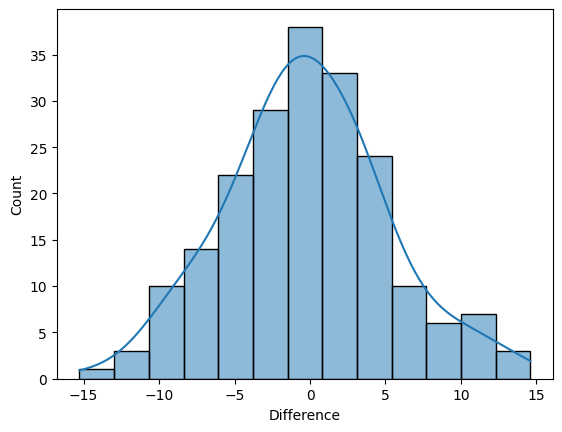

In [52]:
sns.histplot(data=pred_df,x='Difference',kde=True)